In [1]:
addprocs(12)  # parallel computing

12-element Array{Any,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13

INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...


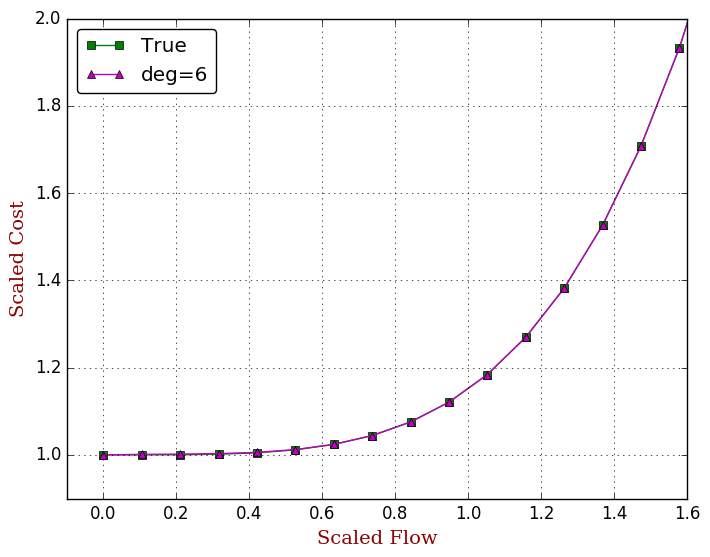

In [2]:
require("demands_adjustment_Sioux")

In [3]:
# get the ground truth flow observations
x_0 = similar(flow_data)
for i = 1:numLinks
    x_0[i] = flows[int(split(link_label_dict["$(i-1)"], ',')[1]), int(split(link_label_dict["$(i-1)"], ',')[2])]
end
x_0

76-element Array{Float64,1}:
  4494.66
  8119.08
  4519.08
  5967.34
  8094.66
 14006.4 
 10022.3 
 14030.6 
 18006.4 
  5200.0 
 18030.6 
  8798.27
 15780.8 
     ⋮   
  8619.54
 10309.4 
 18386.5 
  7000.0 
  8607.39
  9661.82
  8394.9 
  9626.21
  7902.98
 11112.4 
 10259.5 
  7861.83

In [4]:
# get the solution to the TAP, given the demands g^l
x

76-element Array{Float64,1}:
  4534.04
  8112.14
  4509.02
  5996.5 
  8137.16
 14090.0 
 10052.1 
 14061.6 
 18082.4 
  5323.9 
 18054.3 
  8805.74
 15830.0 
     ⋮   
  8616.28
 10261.5 
 18407.2 
  7014.45
  8633.4 
  9626.58
  8399.26
  9669.19
  7870.44
 11120.8 
 10305.6 
  7917.51

In [5]:
require("solveJacob")

In [6]:
# jacob = zeros(length(demandsVec), numLinks)
# jacob = dzeros((length(demandsVec),numLinks), workers()[1:8], [8,1])

@time y = @parallel vcat for i=1:numODpairs
    solveJacob(i)
#     d = solveJacob(i)
#     println(d)
#     for j=1:numLinks
#         jacob[i,j] = d[j]
#     end
#     println("$(i)-th row completed")
end

y = reshape(y, 552, 76)
println(y)

outfile = open("jacobian.json", "w")

JSON.print(outfile, y)

close(outfile)

# M = {1:length(demandsVec)}
# pmap(solveJacob, M)

elapsed time: 1694.279754631 seconds (17809020 bytes allocated)
[-0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.

In [7]:
# load Jacobian
jacobian = readall("jacobian.json");
jacobian = JSON.parse(jacobian);

jacob = zeros(552, 76)
for i = 1:76
    for j = 1:552
        jacob[j, i] = jacobian[i][j]
    end
end

In [8]:
jacob

552x76 Array{Float64,2}:
 -0.0  0.0  0.0   0.0  0.0  0.0  0.0  …  0.0  0.0  0.0   0.0  0.0  0.0  0.0
  1.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  0.0  1.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  1.0  0.0   0.0  0.0  0.0  0.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  -0.0  0.0  0.0  0.0
  1.0  0.0  0.0   0.0  0.0  0.0  0.0  …  0.0  1.0  0.0   0.0  0.0  0.0  0.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  1.0  0.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
  1.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  0.0  1.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0  …  0.0  0.0  0.0   0.0  0.0  0.0  1.0
  1.0  0.0  0.0   0.0  1.0  0.0  1.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0
  0.0  0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0

In [9]:
# compute the gradient
gradi_ = zeros(552)
for i = 1:552
    gradi_[i] = sum([2 * (x[j] - x_0[j]) * jacob[i, j] for j = 1:76])
end

In [10]:
OD_pair_label_dict = Dict()
OD_pair_label_dict_ = Dict()
label = 1
for i = 1:24
    for j = 1:24
        if i != j
            key = "($(i), $(j))"
            OD_pair_label_dict[key] = label
            OD_pair_label_dict_[label] = key
            label += 1
        end
    end
end

In [11]:
OD_pair_label_dict_[552]

"(24, 23)"

In [12]:
# ensure the consistency of dimensions

gradi = zeros(576)

for i = 1:576
    if ~("($(odPairLabel_["$(i)"][1]), $(odPairLabel_["$(i)"][2]))" in keys(OD_pair_label_dict))
        gradi[i] = 0
    else
        gradi[i] = gradi_[OD_pair_label_dict["($(odPairLabel_["$(i)"][1]), $(odPairLabel_["$(i)"][2]))"]]
    end
end

In [13]:
gradi[570], gradi_[547]

(-339.3605272255718,-339.3605272255718)

In [14]:
# for convenience of computing the new demand vector
demandsVec

576-element Array{Float64,1}:
   -0.0   
  104.994 
   95.0693
  475.094 
  190.048 
  314.994 
  524.989 
  839.989 
  524.776 
 1364.85  
  475.212 
  209.957 
  524.948 
    ⋮     
  707.669 
  418.336 
  380.416 
  285.368 
  285.157 
   -0.0   
   95.0475
  404.716 
  518.853 
 1115.59  
  716.523 
   -0.0   

In [15]:
# convert the demand data into dictionary; for convenience of solving the TAP problem and the inverse VI problem

demandsDict = similar(demands)

for key = keys(demands)
    demandsDict[key] = demandsVec[odPairLabel["($(key[1]), $(key[2]))"]]
end

In [16]:
demandsDict[(23,23)]

-0.0

In [17]:
demandsDict

Dict{(Int64,Int64),Float64} with 576 entries:
  (23,8)  => 287.0230453628497
  (8,23)  => 299.3674215044215
  (6,9)   => 381.35806382541404
  (18,3)  => -0.0
  (21,13) => 608.9281335229113
  (22,16) => 1158.664329742141
  (15,17) => 1574.6997727448802
  (22,14) => 1180.665932823669
  (13,9)  => 629.9522195141762
  (23,10) => 1834.8043659946168
  (24,22) => 1115.5853835582311
  (8,9)   => 839.5964769976358
  (9,1)   => 524.7907675569721
  (17,14) => 734.4793412059158
  (16,6)  => 884.8157854343763
  (16,12) => 666.9297134891472
  (16,13) => 627.2382937400898
  (22,2)  => 95.05798722618086
  (24,3)  => -0.0
  (7,16)  => 1463.4101923202682
  (1,12)  => 209.9566826318147
  (4,5)   => 524.442528468669
  (11,8)  => 838.5839664477187
  (18,21) => 95.31007440495976
  (19,4)  => 209.92418397824437
  ⋮        => ⋮

In [18]:
gradi

576-element Array{Float64,1}:
    0.0    
   79.3224 
  312.473  
  328.809  
  661.008  
   90.1892 
  300.396  
   76.9594 
  633.14   
  -27.1938 
  247.572  
   92.438  
  321.782  
    ⋮      
  309.386  
   71.7269 
 -123.59   
   93.712  
    3.45543
 -339.361  
  118.42   
 -185.294  
  -87.5651 
 -152.03   
  138.537  
    0.0    

In [19]:
# compute a descent direction

r = similar(gradi)
for i = 1:length(gradi)
    r[i] = -1 * gradi[i]
end

In [20]:
r

576-element Array{Float64,1}:
   -0.0    
  -79.3224 
 -312.473  
 -328.809  
 -661.008  
  -90.1892 
 -300.396  
  -76.9594 
 -633.14   
   27.1938 
 -247.572  
  -92.438  
 -321.782  
    ⋮      
 -309.386  
  -71.7269 
  123.59   
  -93.712  
   -3.45543
  339.361  
 -118.42   
  185.294  
   87.5651 
  152.03   
 -138.537  
   -0.0    

In [59]:
# compute a search direction

r_ = similar(r)
for i = 1:length(r)
    if (demandsVec[i] > 50) || (demandsVec[i] <= 50 && r[i] > 0)
        r_[i] = r[i]
    else
        r_[i] = 0
    end
end

In [60]:
r_

576-element Array{Float64,1}:
    0.0    
  -79.3224 
 -312.473  
 -328.809  
 -661.008  
  -90.1892 
 -300.396  
  -76.9594 
 -633.14   
   27.1938 
 -247.572  
  -92.438  
 -321.782  
    ⋮      
 -309.386  
  -71.7269 
  123.59   
  -93.712  
   -3.45543
  339.361  
 -118.42   
  185.294  
   87.5651 
  152.03   
 -138.537  
    0.0    

In [61]:
# line search

alphaList = Float64[]

for i = 1:length(r_)
    if r_[i] < 0
        push!(alphaList, -demandsVec[i]/r_[i])
    end
end

alpha_max = minimum(alphaList)

0.12130325757149858

In [80]:
# update

demandsVec_new = similar(demandsVec)
for i = 1:length(demandsVec)
    demandsVec_new[i] = demandsVec[i] + (alpha_max) * r_[i] 
end

In [81]:
demandsVec_new

576-element Array{Float64,1}:
    0.0   
   95.3718
   57.1654
  435.208 
  109.866 
  304.054 
  488.55  
  830.654 
  447.974 
 1368.15  
  445.18  
  198.744 
  485.914 
    ⋮     
  670.139 
  409.635 
  395.408 
  274.0   
  284.738 
   41.1655
   80.6828
  427.193 
  529.475 
 1134.03  
  699.718 
    0.0   

In [82]:
demandsVec

576-element Array{Float64,1}:
   -0.0   
  104.994 
   95.0693
  475.094 
  190.048 
  314.994 
  524.989 
  839.989 
  524.776 
 1364.85  
  475.212 
  209.957 
  524.948 
    ⋮     
  707.669 
  418.336 
  380.416 
  285.368 
  285.157 
   -0.0   
   95.0475
  404.716 
  518.853 
 1115.59  
  716.523 
   -0.0   

In [78]:
demands_0

Dict{(Int64,Int64),Float64} with 576 entries:
  (23,8)  => 287.0230453628497
  (8,23)  => 299.3674215044215
  (6,9)   => 381.35806382541404
  (18,3)  => -0.0
  (21,13) => 608.9281335229113
  (22,16) => 1158.664329742141
  (15,17) => 1574.6997727448802
  (22,14) => 1180.665932823669
  (13,9)  => 629.9522195141762
  (23,10) => 1834.8043659946168
  (24,22) => 1115.5853835582311
  (8,9)   => 839.5964769976358
  (9,1)   => 524.7907675569721
  (17,14) => 734.4793412059158
  (16,6)  => 884.8157854343763
  (16,12) => 666.9297134891472
  (16,13) => 627.2382937400898
  (22,2)  => 95.05798722618086
  (24,3)  => -0.0
  (7,16)  => 1463.4101923202682
  (1,12)  => 209.9566826318147
  (4,5)   => 524.442528468669
  (11,8)  => 838.5839664477187
  (18,21) => 95.31007440495976
  (19,4)  => 209.92418397824437
  ⋮        => ⋮